In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
with open(r'tone_v1.txt','r',encoding='utf-8') as file:
    lines = file.readlines()
    data = [line.strip().split('||') for line in lines]

df=pd.DataFrame(data,columns=['Messages','Sentiment'])

In [30]:
df.head()

,Messages,Sentiment
0,Your creativity is truly inspiring,Appreciative.
1,Thank you for always being so kind and thought...,Appreciative.
2,Your positivity is infectious,Appreciative.
3,Your hard work and dedication are truly impres...,Appreciative.
4,Your kindness and generosity are truly appreci...,Appreciative.


In [31]:
df.tail()

,Messages,Sentiment
3351,"Sorry, but I don't believe you.",Caustic
3352,I'm not going to pretend to be someone I'm not...,Caustic
3353,Did you really just say that to my face?,Caustic
3354,"I don't owe you anything, so don't expect me t...",Caustic
3355,"Sorry, but I'm not interested in your opinion.",Caustic


In [32]:
df.dtypes

Messages     object
Sentiment    object
dtype: object

In [33]:
df.isnull().sum()

Messages     0
Sentiment    0
dtype: int64

<Axes: title={'center': 'Visualization Of Null Values'}>

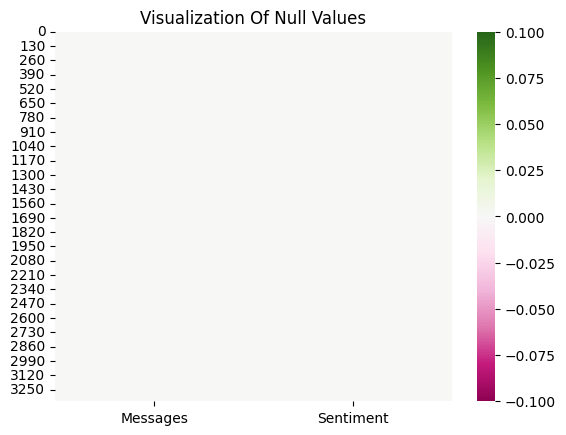

In [34]:
plt.title("Visualization Of Null Values")
sns.heatmap(df.isnull(),cmap='PiYG')

<Axes: title={'center': 'Count Values Of Each Sentiment Label'}, xlabel='Sentiment', ylabel='count'>

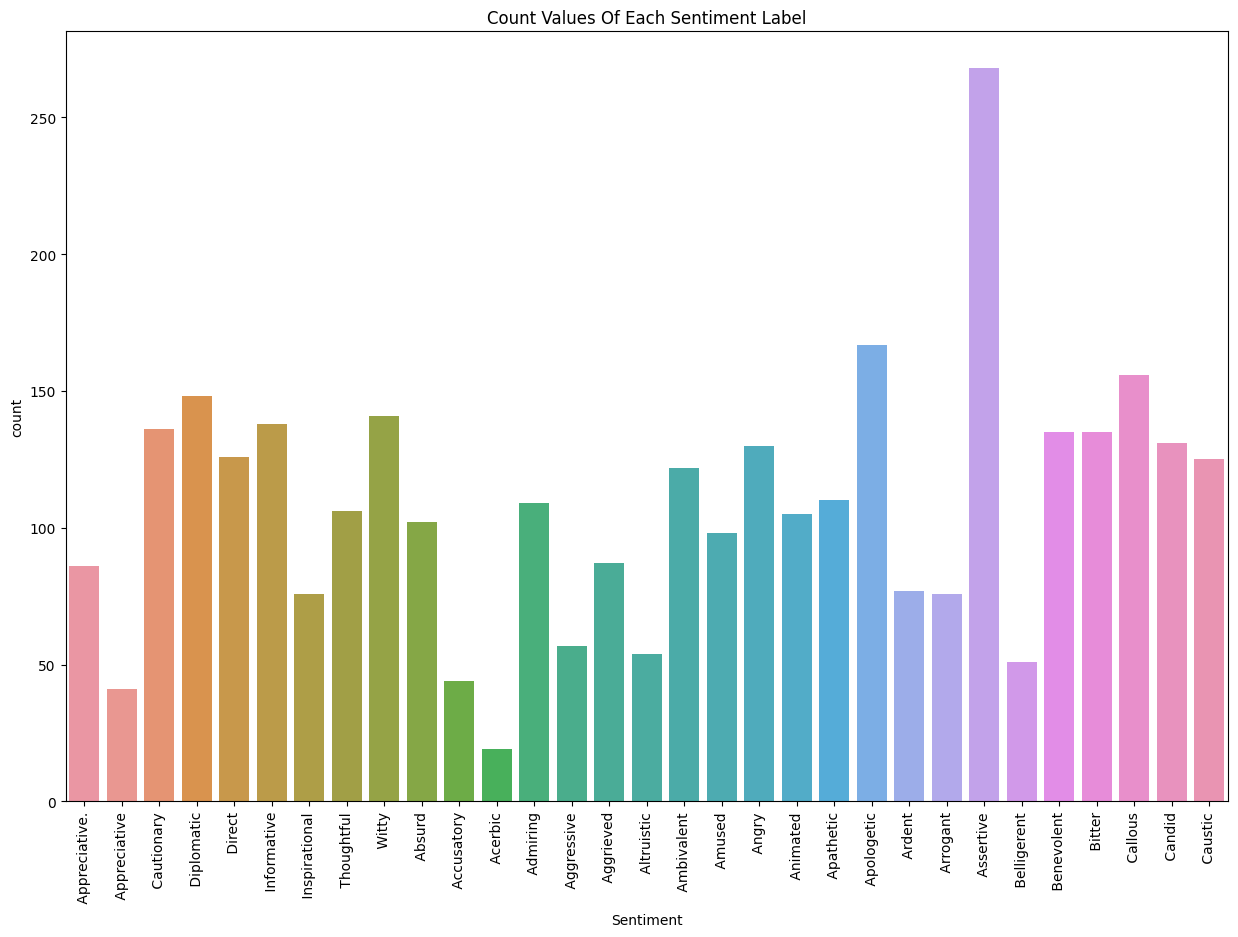

In [35]:
plt.figure(figsize=(15,10))
plt.title("Count Values Of Each Sentiment Label")
plt.xticks(rotation=90)
sns.countplot(data=df,x='Sentiment')

In [36]:
unique_labels=df['Sentiment'].unique()
print("Number of Unique Values equals to --> ",len(unique_labels))
unique_labels

Number of Unique Values equals to -->  31


array([' Appreciative.', ' Appreciative', ' Cautionary', ' Diplomatic',
       ' Direct', ' Informative', ' Inspirational', ' Thoughtful',
       ' Witty', ' Absurd', ' Accusatory', ' Acerbic', ' Admiring',
       ' Aggressive', ' Aggrieved', ' Altruistic', ' Ambivalent',
       ' Amused', ' Angry', ' Animated', ' Apathetic', ' Apologetic',
       ' Ardent', ' Arrogant', ' Assertive', ' Belligerent',
       ' Benevolent', ' Bitter', ' Callous', ' Candid', ' Caustic'],
      dtype=object)

In [37]:
result_dict={}
for key, value in enumerate(unique_labels):
    result_dict[value] = key

In [38]:
result_dict

{' Appreciative.': 0,
 ' Appreciative': 1,
 ' Cautionary': 2,
 ' Diplomatic': 3,
 ' Direct': 4,
 ' Informative': 5,
 ' Inspirational': 6,
 ' Thoughtful': 7,
 ' Witty': 8,
 ' Absurd': 9,
 ' Accusatory': 10,
 ' Acerbic': 11,
 ' Admiring': 12,
 ' Aggressive': 13,
 ' Aggrieved': 14,
 ' Altruistic': 15,
 ' Ambivalent': 16,
 ' Amused': 17,
 ' Angry': 18,
 ' Animated': 19,
 ' Apathetic': 20,
 ' Apologetic': 21,
 ' Ardent': 22,
 ' Arrogant': 23,
 ' Assertive': 24,
 ' Belligerent': 25,
 ' Benevolent': 26,
 ' Bitter': 27,
 ' Callous': 28,
 ' Candid': 29,
 ' Caustic': 30}

In [39]:
df['Sentiment']=df['Sentiment'].map(result_dict)

In [40]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer # To perform stemming Loved ----> Love
corpus=[]
for i in range(0,len(df)):
    review=re.sub('[^a-zA-z]'," ",df['Messages'][i])
    review=review.lower()
    review=review.split()
    stemming=PorterStemmer()
    all_stopwords=stopwords.words('english')
    all_stopwords.remove('not')
    review=[stemming.stem(word) for word in review if not word in set(all_stopwords)]
    review=' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Gyanender\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [41]:
corpus

['creativ truli inspir',
 'thank alway kind thought',
 'posit infecti',
 'hard work dedic truli impress',
 'kind generos truli appreci',
 'gift make peopl feel valu heard',
 'enthusiasm life contagi',
 'unwav support mean world',
 'amaz talent bring peopl togeth',
 'hard work dedic truli inspir',
 'posit optim breath fresh air',
 'heart gold',
 'intellig insight never ceas amaz',
 'true inspir',
 'creativ know bound',
 'sens humor alway brighten day',
 'patienc understand truli admir',
 'passion drive inspir us',
 'way make everyon feel special',
 'wisdom guidanc greatli appreci',
 'dedic work truli remark',
 'heart full compass empathi',
 'posit face advers truli inspir',
 'natur talent leadership',
 'creativ innov truli impress',
 'attent detail truli remark',
 'generos kind exampl us',
 'special gift bring joy live other',
 'talent hard work truli inspir',
 'determin resili inspir us',
 'abil think outsid box truli impress',
 'strength courag face challeng truli admir',
 'dedic fami

In [49]:
from sklearn.feature_extraction.text import CountVectorizer
ct=CountVectorizer()
X=ct.fit_transform(corpus)
X=X.toarray()

In [50]:
len(X[1])

2424

In [51]:
y=df.iloc[:,-1].values
y

array([ 0,  0,  0, ..., 30, 30, 30], dtype=int64)

In [52]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [54]:
print("X Train Shape", x_train.shape)
print("X Test Shape", x_test.shape)
print("Y Train Shape", y_train.shape)
print("Y Test Shape", y_test.shape)

X Train Shape (2349, 2424)
X Test Shape (1007, 2424)
Y Train Shape (2349,)
Y Test Shape (1007,)


In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [58]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [59]:
models=[
        ("SVM",SVC()),
        ("LogisticRegression",LogisticRegression()),
        ("DecisionTreeClassifier",DecisionTreeClassifier(random_state=0)),
        ("RandomForestClassifier",RandomForestClassifier(n_estimators=100)),
        ("KNeighborsClassifier",KNeighborsClassifier(n_neighbors=5,p=2,metric='minkowski')),
        ("NaiveBayes",GaussianNB())
        ]

c:\Users\Gyanender\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Gyanender\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Gyanender\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

============================================= CLASSIFICATION REPORT ===============================================
Model Name SVM
              precision    recall  f1-score   support

           0       0.50      0.10      0.17        29
           1       0.00      0.00      0.00         7
           2       0.83      0.76      0.79        38
           3       0.83      0.79      0.81        43
           4       0.84      0.47      0.60        45
           5       0.74      0.88      0.80        51
           6       1.00      0.29      0.44        28
           7       0.58      0.70      0.63        27
           8       0.70      0.70      0.70        50
           9       0.86      0.39      0.53        31
          10       0.50      0.07      0.12        14
          11       0.00      0.00      0.00         4
          12       0.44      0.70      0.54        30
          13       1.00      0.14      0.24        22
          14       0.89      0.63      0.74        27
    

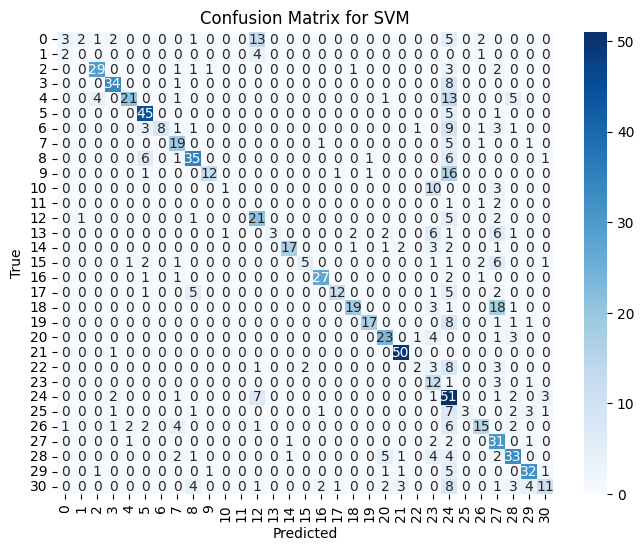

============================================= CLASSIFICATION REPORT ===============================================
Model Name LogisticRegression
              precision    recall  f1-score   support

           0       0.44      0.28      0.34        29
           1       0.00      0.00      0.00         7
           2       0.80      0.84      0.82        38
           3       0.82      0.74      0.78        43
           4       0.78      0.64      0.71        45
           5       0.90      0.88      0.89        51
           6       0.76      0.46      0.58        28
           7       0.65      0.81      0.72        27
           8       0.76      0.76      0.76        50
           9       0.81      0.68      0.74        31
          10       0.29      0.14      0.19        14
          11       0.00      0.00      0.00         4
          12       0.45      0.57      0.50        30
          13       0.44      0.18      0.26        22
          14       0.68      0.56      0.61

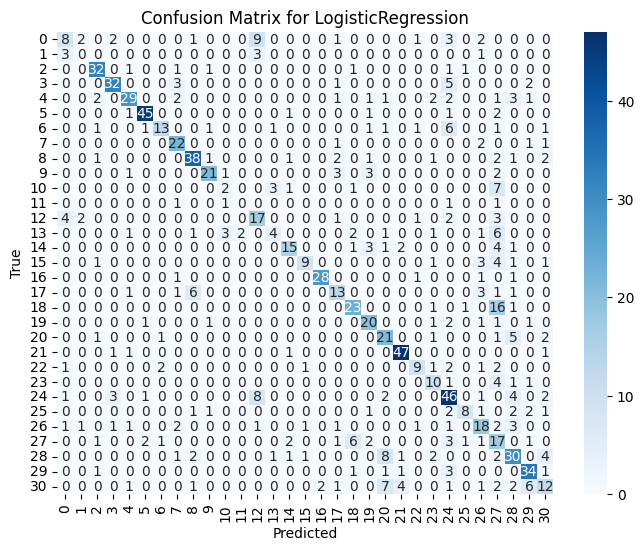

============================================= CLASSIFICATION REPORT ===============================================
Model Name DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.40      0.14      0.21        29
           1       0.06      0.14      0.08         7
           2       0.72      0.55      0.63        38
           3       0.77      0.47      0.58        43
           4       0.68      0.42      0.52        45
           5       0.82      0.82      0.82        51
           6       0.52      0.43      0.47        28
           7       0.44      0.56      0.49        27
           8       0.73      0.76      0.75        50
           9       0.68      0.55      0.61        31
          10       0.11      0.64      0.19        14
          11       0.25      0.25      0.25         4
          12       0.31      0.43      0.36        30
          13       0.00      0.00      0.00        22
          14       0.82      0.52      

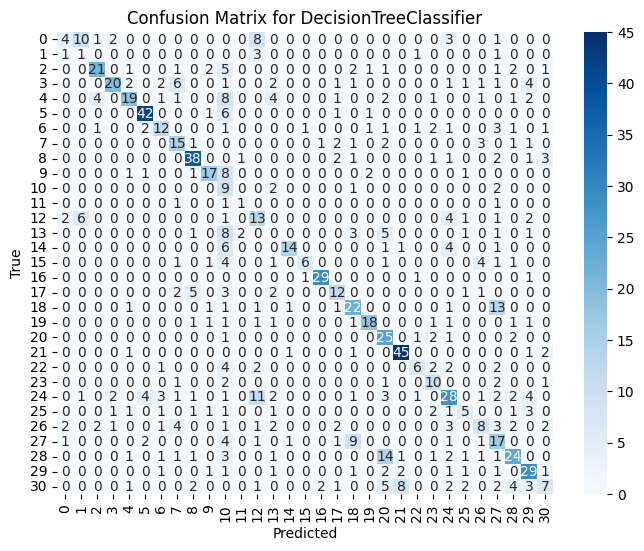

============================================= CLASSIFICATION REPORT ===============================================
Model Name RandomForestClassifier
              precision    recall  f1-score   support

           0       0.55      0.21      0.30        29
           1       0.00      0.00      0.00         7
           2       0.82      0.71      0.76        38
           3       0.79      0.72      0.76        43
           4       0.63      0.49      0.55        45
           5       0.96      0.86      0.91        51
           6       0.80      0.43      0.56        28
           7       0.68      0.56      0.61        27
           8       0.87      0.66      0.75        50
           9       0.80      0.65      0.71        31
          10       0.13      0.21      0.16        14
          11       0.00      0.00      0.00         4
          12       0.39      0.60      0.47        30
          13       0.03      0.05      0.03        22
          14       0.83      0.70      

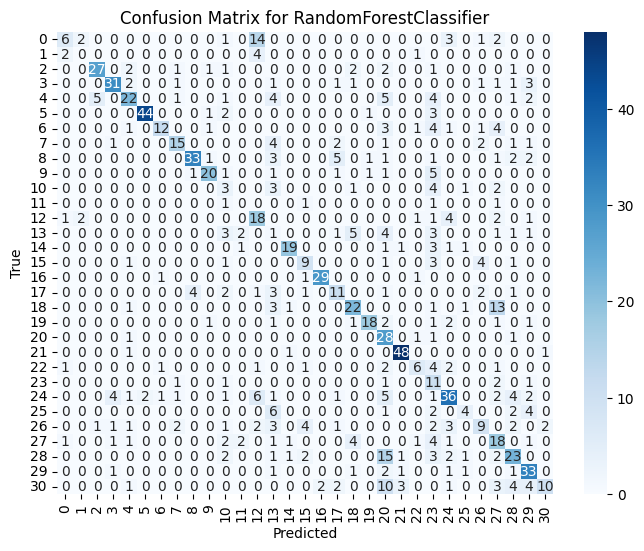

c:\Users\Gyanender\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Gyanender\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Gyanender\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

============================================= CLASSIFICATION REPORT ===============================================
Model Name KNeighborsClassifier
              precision    recall  f1-score   support

           0       0.23      0.17      0.20        29
           1       0.00      0.00      0.00         7
           2       0.89      0.63      0.74        38
           3       0.78      0.42      0.55        43
           4       0.33      0.42      0.37        45
           5       1.00      0.59      0.74        51
           6       0.60      0.32      0.42        28
           7       0.60      0.11      0.19        27
           8       0.87      0.52      0.65        50
           9       0.75      0.10      0.17        31
          10       0.05      0.86      0.10        14
          11       0.00      0.00      0.00         4
          12       0.48      0.67      0.56        30
          13       0.02      0.05      0.03        22
          14       0.36      0.33      0.

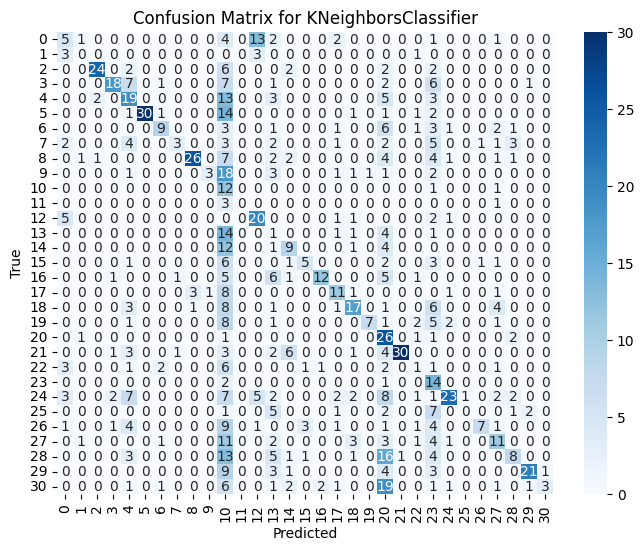

============================================= CLASSIFICATION REPORT ===============================================
Model Name NaiveBayes
              precision    recall  f1-score   support

           0       0.19      0.10      0.13        29
           1       0.04      0.29      0.07         7
           2       0.82      0.82      0.82        38
           3       0.55      0.74      0.63        43
           4       0.79      0.49      0.60        45
           5       0.96      0.88      0.92        51
           6       0.54      0.54      0.54        28
           7       0.54      0.56      0.55        27
           8       0.76      0.58      0.66        50
           9       0.95      0.61      0.75        31
          10       0.30      0.50      0.38        14
          11       0.11      0.25      0.15         4
          12       0.32      0.30      0.31        30
          13       0.11      0.09      0.10        22
          14       0.69      0.67      0.68        

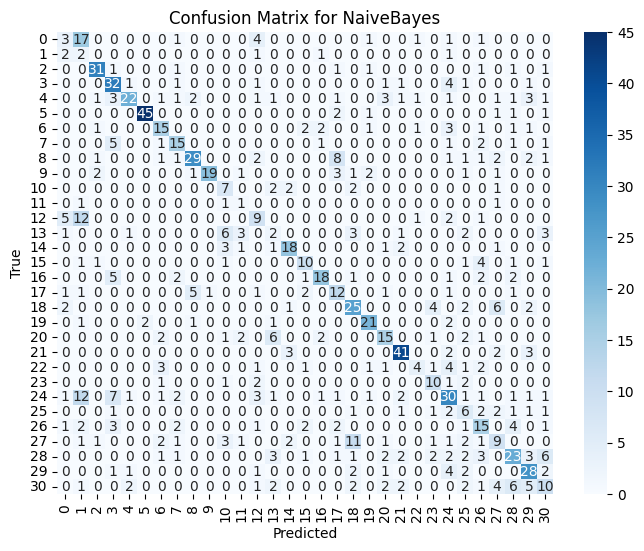

In [66]:
result = {}
for name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    report = classification_report(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    score = accuracy_score(y_test, y_pred) * 100

    print("============================================= CLASSIFICATION REPORT ===============================================")
    print(f"Model Name {name}")
    print(report)
    print("============================================= ACCURACY SCORE ===============================================")
    print(f"Model Name {name}")
    print(f"{name} Accuracy Score ::", score)
    result[name] = score

    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(f"Confusion Matrix for {name}")
    plt.show()

In [64]:
result

{'SVM': 58.68917576961271,
 'LogisticRegression': 61.8669314796425,
 'DecisionTreeClassifier': 51.340615690168825,
 'RandomForestClassifier': 57.79543197616683,
 'KNeighborsClassifier': 37.23932472691162,
 'NaiveBayes': 52.33366434955313}

In [62]:
result_tuples = [(model, score) for model, score in result.items()]
df1=pd.DataFrame(result_tuples,columns=['ModelName','Score'])

Text(0, 0.5, 'Score')

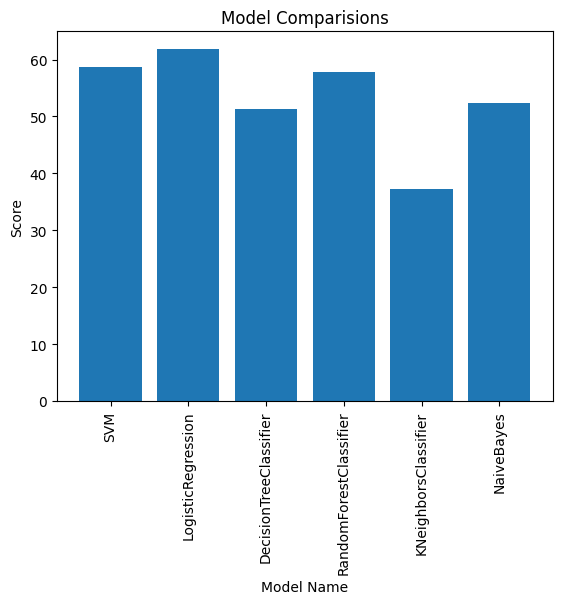

In [63]:
plt.title("Model Comparisions")
plt.xticks(rotation=90)
plt.bar(x=df1['ModelName'], height=df1['Score'])
plt.xlabel("Model Name")
plt.ylabel("Score")

In [65]:
print(f"The Best Accuracy Score For Email Classification is {round(df1['Score'].max(),2)} % ")
print("The Best Model For Email Classification is/are:")
best_models = df1[df1['Score'] == df1['Score'].max()]
for index, row in best_models.iterrows():
    print(f"Model Name: {row['ModelName']}\nScore: {row['Score']}\n")

The Best Accuracy Score For Email Classification is 61.87 % 
The Best Model For Email Classification is/are:
Model Name: LogisticRegression
Score: 61.8669314796425

